In [1]:
# immport libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set random seed and number of observations m
np.random.seed(0)
m = 10000

In [3]:
# Create two randomly generated multivariate normal sets of features
train_X1 = np.random.multivariate_normal(mean = [0,0], cov = [[0.75,0.5],[0.5,0.75]], size = m)
train_X2 = np.random.multivariate_normal(mean = [2,4], cov = [[0.75,0.5],[0.5,0.75]], size = m)

In [4]:
# Combined features and apply target labels
train_X = np.vstack((train_X1,train_X2)).astype(np.float32)
train_Y = np.hstack((np.zeros(m),np.ones(m)))

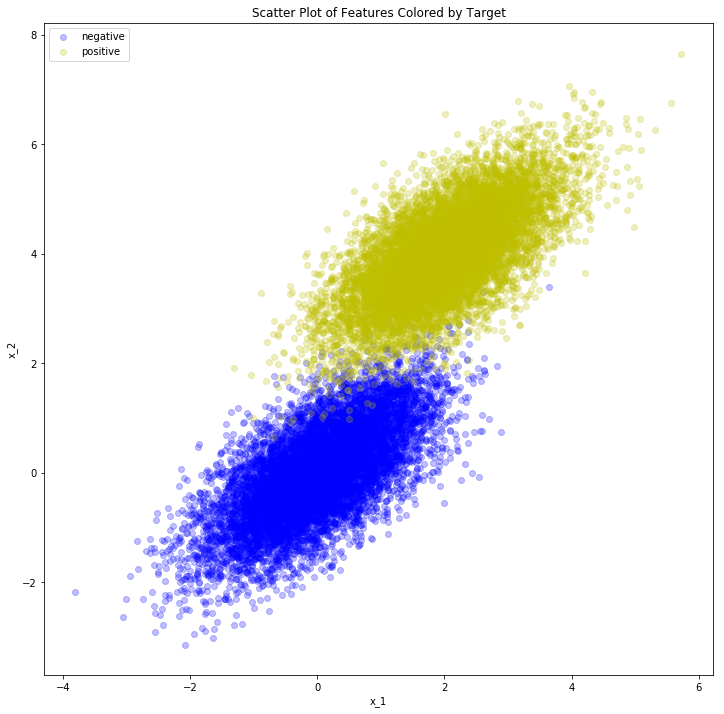

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(train_X1[:,0], train_X1[:,1], c = 'b', alpha = 0.25, label = 'negative')
plt.scatter(train_X2[:,0], train_X2[:,1], c = 'y', alpha = 0.25, label = 'positive')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter Plot of Features Colored by Target')
plt.legend()

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def logistic_regression(x, y, num_steps, alpha, add_intercept = False):
    
    if add_intercept:
        intercept = np.ones((x.shape[0], 1))
        x = np.hstack((intercept, x))
       
    theta = np.zeros(x.shape[1])
    
    for step in range(num_steps):
        
        z = np.dot(x, theta)
        h = sigmoid(z)

        # Update weights with gradient descent
        # gradient of cost Del_C = SUM[(h - y)x]
        # weights theta update rule theta_j = theta_j - alpha*(dC/dtheta_j)
        error = h - y
        gradient = np.dot(error, x)
        theta -= alpha*gradient
        
    return theta

In [10]:
theta = logistic_regression(x = train_X, y = train_Y, num_steps = 250000, alpha = 1e-6, add_intercept = True)

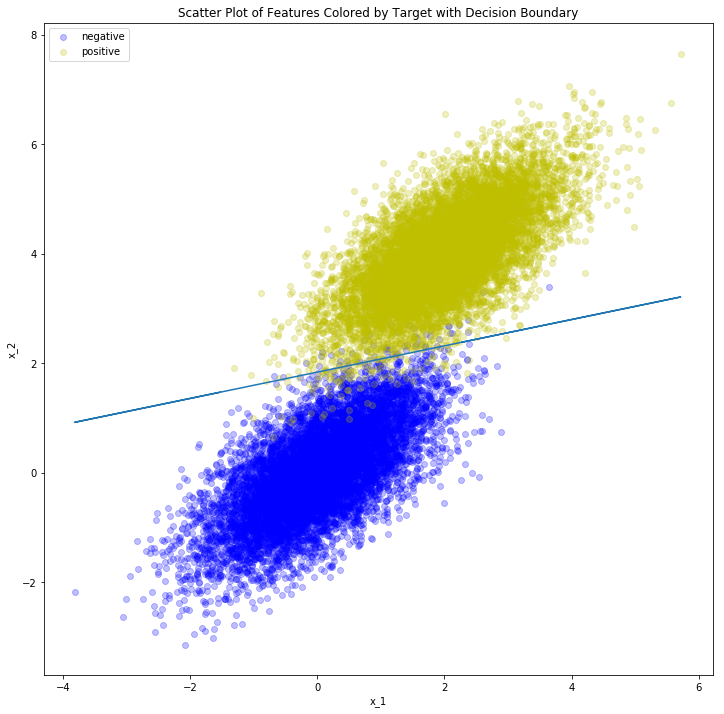

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(train_X1[:,0], train_X1[:,1], c = 'b', alpha = 0.25, label = 'negative')
plt.scatter(train_X2[:,0], train_X2[:,1], c = 'y', alpha = 0.25, label = 'positive')
# Decision Boundary h_theta(x) = 0.5 = theta_0 + theta_1*x_1 + theta_2*x_2
# x_2 = (0.5 - theta_0 - theta_1*x_1)/theta_2
plt.plot(train_X[:,0],(0.5-theta[0]-theta[1]*train_X[:,0])/theta[2],'-')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter Plot of Features Colored by Target with Decision Boundary')
plt.legend()